# 3022 - Final Project - Heart Disease Predictor
### Alex Jocius

### **Introduction**
Heart disease continues to remain an epidemic, affecting millions of people across the globe.  An umbellra term, heart diesease is used to describe several different types of conditions that affect the heart, ranging from arrthymias to coronary artery disease (CAD). Currently the number one cause of death for both men and women in the United States, heart disease is directly accountable for 1 in 4 deaths within the country [1].  Timely treament of this illness can be the difference between life and death, making it is imperative to develop methods and tools to accurately predict one's heart health to help mitigate any potential damage.

As is typical with many illnesses, heart disease sufferers can present with a myriad of different symptoms, vital signs, and test results. Sifting through large datasets to determine the most inluential factors can prove challenging; however, modern machine learning techniques can prove invaluable to determine those symptoms that most signify a person's risk of heart disease.

In this project, I will use a common and widely cited dataset from the UCI Machine Learning Repository to investigate certain lab values and presented symptoms for a number of different patients. Using classification methods, I will identify the most influential factors and develop a model that can be used to detemine if a patient is suffering from heart disease.

### **Overview of Data**

The dataset for this project is taken from the UCI Machine Learning Repository found here: https://archive.ics.uci.edu/ml/datasets/Heart+Disease. Although the repsitory has four seperate sets of data from different sources, this author chose to use the data set from the Cleveland Clinic Foundation, as it is stated to be the most useful in machine learning applications.  The data consists of 303 entries, having a total of 14 attributes per entry.  The attributes are summarized below:

1. **age** (numerical) -
        Age of the patient.
2. **sex** (categorical) -<br>
        Sex of the patient.
            1 = Male
            2 = Female
3. **cp** (categorical) -
        Type of chest pain present.
            1 = Typical Angina - Chest pain that consists of substernal chest pain thta is provoked by exertion or emotional stress and is relieved by rest.
            2 = Atypical Angina - Applies when 2 out of 3 criteria of classic angina are present.
            3 = Non-anginal pain - Chest pain the resembles heart pain, but is not typical or atypical angina.
            4 = Asymptomatic - No pain present.
4. **trestbps** (numerical) -
        Resting, systolilc blood pressure (in mm Hg).  Measures the force of blood against the artery walls.
5. **chol** (numerical) -
        Serum cholesterol level, in mg/dl.  Measures the total amount of cholersterol in the patient's body, including HDL, LDL, and triglycerides.
6. **fbs** (numerical) - 
        Deterimes if the patient's fasting blood sugar level is greater than 120 mg/dl
            1 = true
            0 = false
7. **restecg** (categorical) -
        Resting electrocardiographic results. Results can give insight into uncharacteristic wave patterns of a beating heart.
            0 = normal - Regular and characteristic pattern.
            1 = ST-T wave abnormality - Can be a normal variant or signal cardiac pathology.
            2 = Probable or definite left ventricular hypertrophy - Signals thickening of the wall of the heart's main pumping chamber.
8. **thalach** (numerical) -
        Maximum heart rate achieved, in bpm
9. **exang** (categorical) -
        Exercised induced angina (chest pain)
            1 = Yes
            0 = No
10. **oldpeak** (numerical) - 
        ST depression induced by exercise relative to rest.  Considered significant at certian thresholds.
11. **slope** (categorical) - 
        The slope of the peak exercise ST segment during an ECG stress test.
            1 = upsloping - Normal
            2 = flat - Abnormal
            3 = downsloping - Abnormal
12. **ca** (categorical) -
        Number of major vessels (0-3) colored by flourosopy.  Can signal a blockage(s) in the heart.
13. **thal** (categorical) -
        A nuclear imaging test that shows how well the blood flows into your heart.
        3 = normal
        6 = fixed defect
        7 = reversable defect
14. **num** (categorical) - 
        Heat disease diagnosis
            0 = Not present
            1,2,3 = severity


### **Exploratory Data Analysis (EDA)**

The first step is to import the dataset and start an investigation into any patterns, outliers, or general anomolies.  Exploratory Data Analysis will help to identify any erroneous data and will help provide insight into the dataset.  The data is imported in a *.data* format, and the column names are assigned.  An investigation into the first five rows shows that the data was imported as expected.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import scipy as sp
import scipy.stats as stats

import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

import sklearn.linear_model
import sklearn.neighbors as neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn. ensemble import RandomForestClassifier

In [2]:
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df = pd.read_csv('processed.cleveland.data', names = column_names)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Describe will tell us some attributes of this dataset.  We can see that there are 303 rows of data, and 14 columns.

In [3]:
df = df.drop_duplicates()
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303,303,303.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176,166,NaN
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,NaN,NaN,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,NaN,NaN,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,NaN,NaN,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,NaN,NaN,2.000000


The data is examined to determine if there are any NaN values.  There are no such values in the dataset.

In [4]:
print(df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


The dataset is also examined for datatypes.  It is shown that both the *ca* and *thal* data are set as *object*.  More investigation into these values are needed to determine where the discepancy is coming from, as these values should be set to numeric values.

In [5]:
df.describe()
print(df.dtypes)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object


The unique values for these two columns are shown below.

In [6]:
df.ca.unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [7]:
df.thal.unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

Removing the rows containing these erroneous values and setting the appropriate datatype for each column, I can then use *desribe()* again to see my cleaned data set.  We can see that there are 297 rows left for analysis.

In [8]:
df = df.replace({'?':np.nan}).dropna()
df = df.astype(float).astype(int)
df = df.astype({'oldpeak': float})
df['num'] = df['num'].where(df['num'] == 0, 1)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,0.777778,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.076991,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.000000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.000000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.000000,3.000000,3.000000,7.000000,1.000000


Plotting the individual attributes of the dataset can lead to some initial insights into their respective values and distributions.  It is clear to see from the histograms below that a large majority of the study participants where over the age of 40.  In fact, the mean age of the study participants was 55.  We can also see that there are about double the number of men as there are women.

The resting blood pressure and cholesterol levels are borderline high for most study subjects, but the majority did not suffer from angina (chest pain) and did not have elevated fasting blood sugar levels.  About half of the subjects had abnromal ecg readings, perhaps signaling a correlation between this attribute and the response.

It is important to note that the number of patients with heart disease present and the number of patients without heart disease is nearly evenly split.  This should provide a good dataset moving forward.

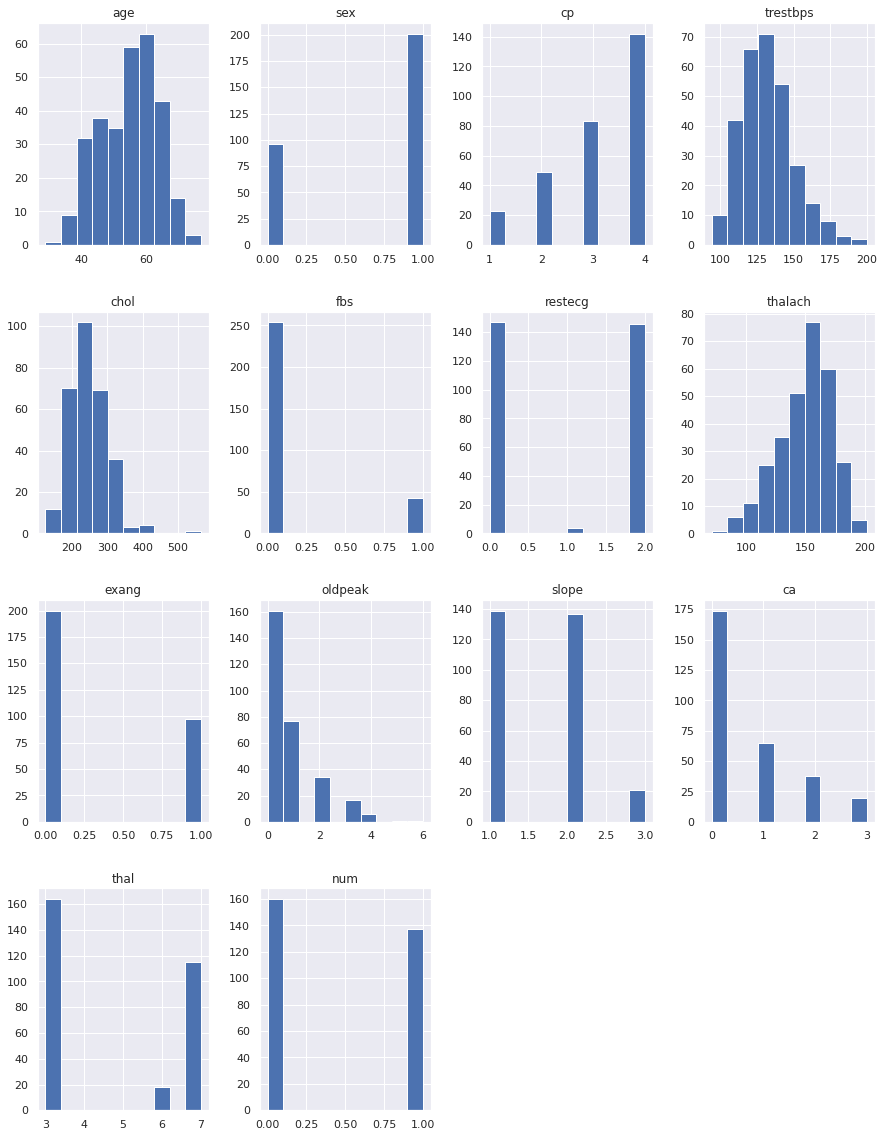

In [9]:
fig = df.hist(figsize = (15,20));

Diving deeper into the distribution of the study subjects, we can see that a large majority of those suffering from heart disease were men.  

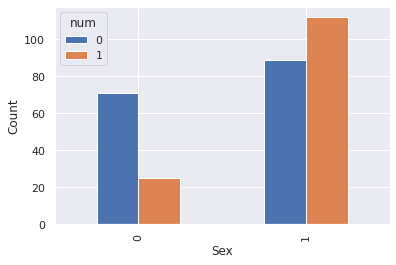

In [10]:
df_numSex = pd.crosstab(df['sex'], df['num'])
ax = df_numSex.plot.bar()
plt.xlabel("Sex")
plt.ylabel("Count");

I will use pairplots to find any relationships between different variables.  I use *num* as the seperator, investigating how different variables are correlated against the response.  We can see that there are various weak relationships between certain variables; however, overall there does not appear to be great granularity.

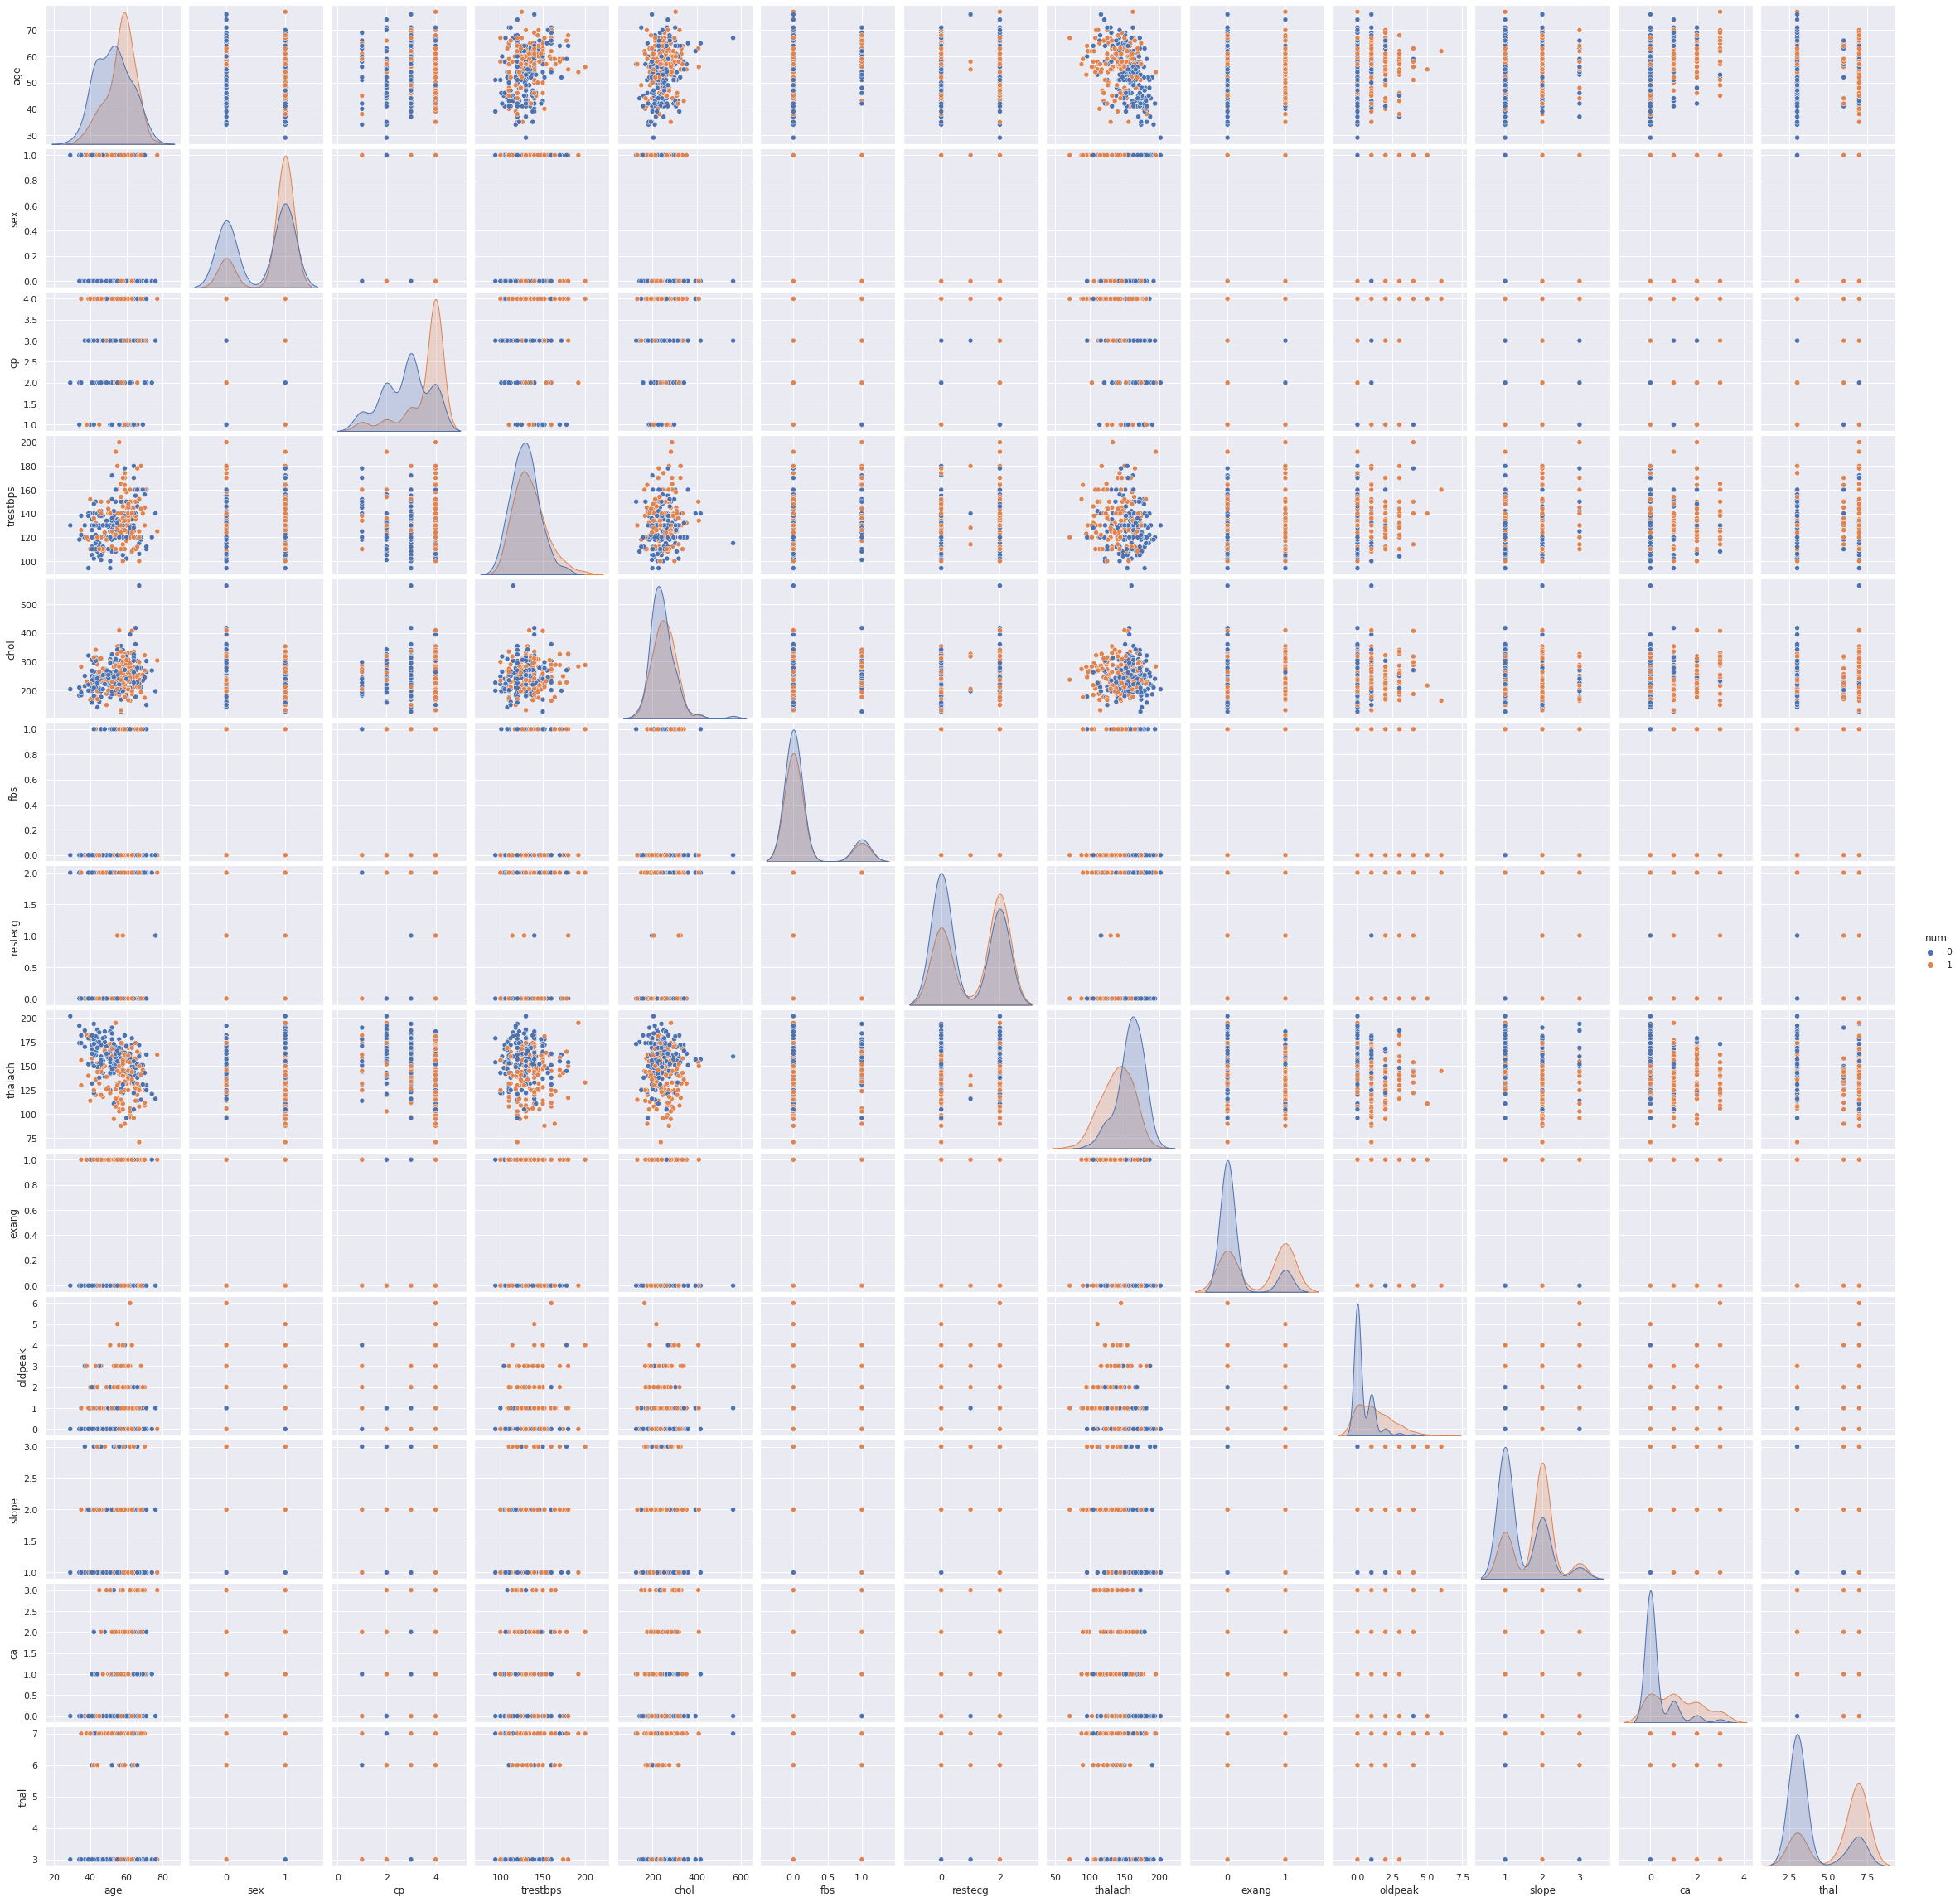

In [11]:
sns.pairplot(df, hue='num');

I will use a correlation matrix and seaborn's heatmap to determine the associations between the different attributes.  Since the heatmap is symmetric about the diagonal, I will only plot part of the matrix.  

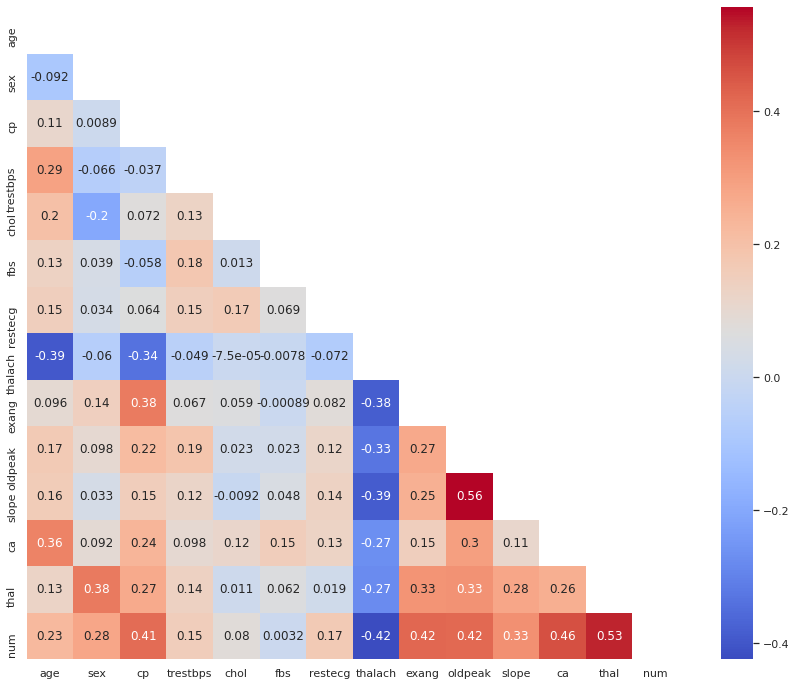

In [12]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 12))
    ax = sns.heatmap(corr, cmap = "coolwarm", annot=True, mask=mask, square = True)

The correlation matrix shows that there are some moderate relationships between a few attributes, but no stongly defined linear relationships.  Heart abnormalities during exercise appear to have the strongest relationship to the response among these study subjects.  It appears as if chol and fbs attributes have a limited relationship to the response and may be dropped from and future models.

### **Model selection**

#### **Logistic Regression**

Logistic regression aims to model the probability of a discrete outcome given an input variable(s).  Since I encoded my response as a 0 or a 1, this model will be appropriate.  I start by splitting my data into a test, train split and scaling the resulting data fields.  For each model, I use the accuracy, f1 score, and confusion matrix to determine the differences between the models and to select the best one.  I list the f1 score as it combines the precision and recall of a given classifier and may produce a more robust measure for comparison between models.  My test-training split is set at 75% training data, which should provide enough data points for my test data set, even with the relatively low number of imported data points.

In [13]:
y = df['num']
X = df.drop('num', axis=1)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size = .75)

In [14]:
scaler = sklearn.preprocessing.MinMaxScaler()
X_test = scaler.fit_transform(X_test)
X_train = scaler.fit_transform(X_train)

The accuracy of the logistic regression model is: 0.893
The f1 score of the logistic regression model is: 0.871
The confusion matrix for the logistic model is:



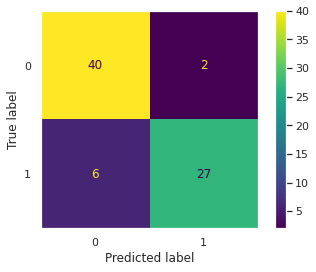

In [39]:
lr = sklearn.linear_model.LogisticRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
lr_acc = print('The accuracy of the logistic regression model is:', np.round(sklearn.metrics.accuracy_score(lr_pred, y_test), decimals=3))
lr_f1 = print('The f1 score of the logistic regression model is:', np.round(sklearn.metrics.f1_score(y_test, lr_pred), decimals=3))
fpr_lr, tpr_lr, thresholds_lr = sklearn.metrics.roc_curve(y_test,lr_pred)
print('The confusion matrix for the logistic model is:\n')
cm_lr = sklearn.metrics.confusion_matrix(y_test, lr_pred, labels=lr.classes_)
disp_lr = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr.classes_)
disp_lr.plot()
plt.grid(None)
plt.show()

Logistic regression appears to provide a decent accuracy of the test data set.  The confusion matrix shows that there were 6 false negatives and 2 false positives.

#### **K-Nearest Neighbor**

The K-Nearest Neighbor alogirthm uses the Euclidean distance to determine similarity between attributes.  Without scaling the data from the ealier step, the results may have been skewed based on a given attributes scale.  To determine the best k, I used a for loop to calculate the accuracy based on the selected k.

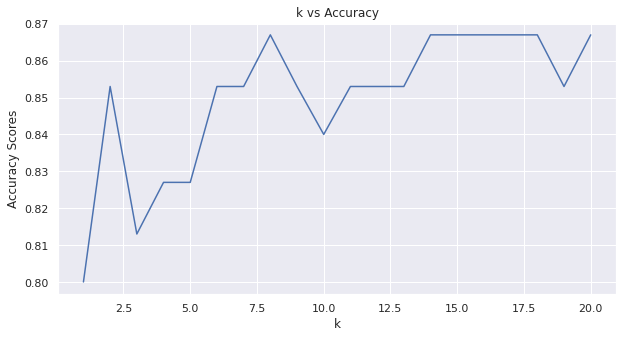

In [16]:
scores = []
k = []
best_acc = 0
best_k = 0

for i in range (1, 21):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i, weights='uniform')
    knn.fit(X_train, y_train)
    
    knn_pred = knn.predict(X_test)
    knn_acc = np.round(sklearn.metrics.accuracy_score(knn_pred, y_test), decimals=3)
    k.append(i)
    scores.append(knn_acc)
    
    if (knn_acc > best_acc):
        best_acc = knn_acc
        best_k = i

fix, ax = plt.subplots(figsize=(10, 5))
plt.plot(k, scores)
plt.xlabel('k')
plt.ylabel('Accuracy Scores')
plt.title('k vs Accuracy');

The accuracy of the KNN model is: 0.867
The f1 score of the KNN is: 0.839
The confusion matrix for the logistic model is:



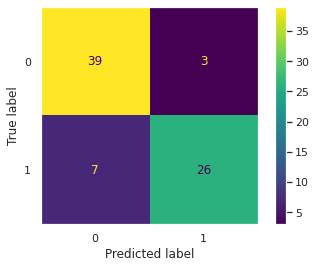

In [35]:
knn = neighbors.KNeighborsClassifier(n_neighbors=best_k, weights='uniform')
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

knn_acc = np.round(sklearn.metrics.accuracy_score(knn_pred, y_test), decimals=3)
knn_f1 = np.round(sklearn.metrics.f1_score(y_test, knn_pred), decimals=3)
print('The accuracy of the KNN model is:',knn_acc)
print('The f1 score of the KNN is:',knn_f1)
fpr_knn, tpr_knn, thresholds_knn = sklearn.metrics.roc_curve(y_test,knn_pred)
print('The confusion matrix for the logistic model is:\n')
cm_knn = sklearn.metrics.confusion_matrix(y_test, knn_pred, labels=knn.classes_)
disp_knn = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp_knn.plot()
plt.grid(None)
plt.show()

We can see that a k value of 8 provided the best accuracy in this particular instance.  The KNN model did not perform as well as the logistic regression model, but it still achieves as similar accurcacy and f1 score.  The confusion matrix shows there were 7 false negatives, one higher than the logistic regression model.

#### **Linear Disciminant Analysis**

Linear Discriminant Analysis is a reduction technique that aims to separte the means and limit the variablity among different features.  

The accuracy of the LDA model is: 0.867
The f1 score of the LDA is: 0.844
The confusion matrix for the logistic model is:



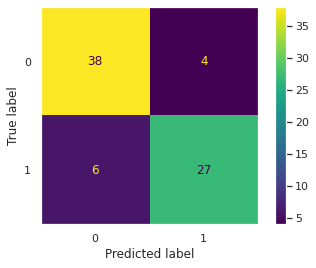

In [37]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)

lda_acc = np.round(sklearn.metrics.accuracy_score(lda_pred, y_test), decimals=3)
lda_f1 = np.round(sklearn.metrics.f1_score(y_test, lda_pred), decimals=3)
print('The accuracy of the LDA model is:',lda_acc)
print('The f1 score of the LDA is:',lda_f1)
fpr_lda, tpr_lda, thresholds_lda = sklearn.metrics.roc_curve(y_test,lda_pred)
print('The confusion matrix for the logistic model is:\n')
cm_lda = sklearn.metrics.confusion_matrix(y_test, lda_pred, labels=lda.classes_)
disp_lda = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm_lda, display_labels=lda.classes_)
disp_lda.plot()
plt.grid(None)
plt.show()

We can see that LDA performs pretty much the same as KNN model, however, the f1 score is bit higher.  The confusion matrix shows that there were 6 false negatives.

#### **Random Forest**

A Random Forest model builds mulitiple decision trees and merges them together to obtain a more accurate prediction.  This alogirthm is well suited to classification and I wanted to test the accuracy of running such a model.

The accuracy of the RF model is: 0.853
The f1 score of the RF is: 0.82
The confusion matrix for the logistic model is:



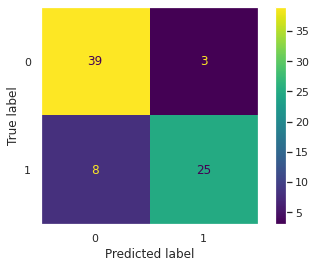

In [38]:
rf = RandomForestClassifier(n_estimators=325)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_acc = np.round(sklearn.metrics.accuracy_score(rf_pred, y_test), decimals=3)
rf_f1 = np.round(sklearn.metrics.f1_score(y_test, rf_pred), decimals=3)
print('The accuracy of the RF model is:',rf_acc)
print('The f1 score of the RF is:',rf_f1)
fpr_rf, tpr_rf, thresholds_rf = sklearn.metrics.roc_curve(y_test,rf_pred)
print('The confusion matrix for the logistic model is:\n')
cm_rf = sklearn.metrics.confusion_matrix(y_test, rf_pred, labels=rf.classes_)
disp_rf = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp_rf.plot()
plt.grid(None)
plt.show()

We can see that the random forest algorithm did worse than the other three and produced a larger number of false negatives.

#### **Model Interpretation**

Based on the results above, we can see that logistic regression may be the model of choice.  Ideally, we would like maximize the true positive rate and limit the false poistive rate. We want to make sure those with heart disease are accurately being diagnosed and those without heart disease are not told they have it.  An ROC curve can display this information for the tested models. 

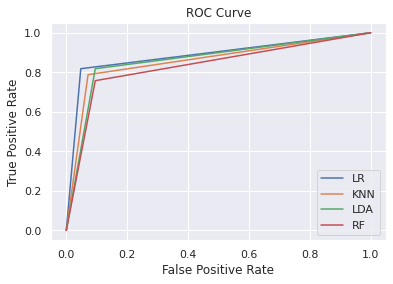

In [20]:
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.plot(fpr_lda, tpr_lda, label='LDA')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend();

I was interested in looking into the feature importance for the logistic regression model to determine which features were the most useful for prediction.

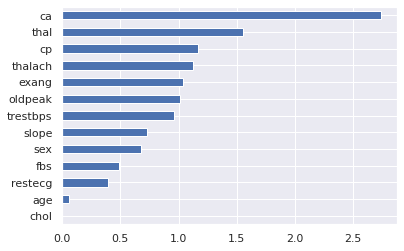

In [21]:
pd.Series(abs(lr.coef_[0]), index=X.columns).nlargest(13).plot(kind='barh').invert_yaxis()

#### **Logistic Regression Refinement**

Based on the feature importance graph, I wanted to determine if some predictors could be removed to help limit the complexity of the model while still maintaining a high accuracy.  I removed each predictor, one at a time, and took note of the accuracy.

In [22]:
arranged_columns = np.array(pd.Series(abs(lr.coef_[0]), index=X.columns).nsmallest(13).index)
print(arranged_columns)

['chol' 'age' 'restecg' 'fbs' 'sex' 'slope' 'trestbps' 'oldpeak' 'exang'
 'thalach' 'cp' 'thal' 'ca']


0.893


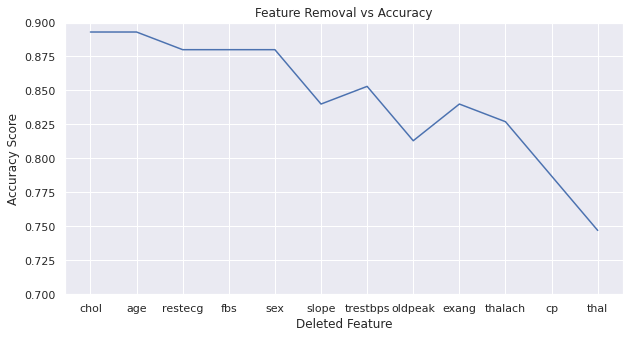

In [23]:
del_col = []
acc_arr = []
max_acc = 0
for i in range(len(arranged_columns) - 1): 
    del_col.append(arranged_columns[i])
    idx= []
    for col in del_col:
        for i in range(len(column_names)):
            if (col == column_names[i]):
                idx.append(i)

    idx_sorted = np.sort(idx)
    X_test_rev = np.delete(X_test, idx_sorted, 1)
    X_train_rev = np.delete(X_train, idx_sorted, 1)
    
    scaler = sklearn.preprocessing.MinMaxScaler()
    X_test_rev = scaler.fit_transform(X_test_rev)
    X_train_rev = scaler.fit_transform(X_train_rev)
    
    lr_rev = sklearn.linear_model.LogisticRegression()
    lr_rev.fit(X_train_rev, y_train)
    lr_pred_rev = lr_rev.predict(X_test_rev)
    lr_acc_rev = np.round(sklearn.metrics.accuracy_score(lr_pred_rev, y_test), decimals=3)
    acc_arr.append(lr_acc_rev)
    if (lr_acc_rev > max_acc):
        max_acc = lr_acc_rev

print(max_acc)
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(del_col, acc_arr)
plt.ylim(.70, .90)
plt.xlabel('Deleted Feature')
plt.ylabel('Accuracy Score')
plt.title('Feature Removal vs Accuracy');

It appears that at least two predictors, namely *chol* and *fbs*, can be removed without affecting accuracy.

### **Conclusions**

Data Science can help to arm medical professionals with predictive tools to aid in diagnosis.  Machine learning classification techniques can be invaluable in providing an accuracte binary response for a multivariate disease prediction problem.  However, care must be taken when applying these methods.  Sufficient and thorough data is needed in order to  apply a given classification model, and comphrehensive data exploration must be performed to understand each feature.  

The heart disease predictor showed that various predictive models could be applied to the UCI Machine Learning data set.  Certain models, such as linear regression, proved to be more useful based on the model accuracy, f1 score, and confusion matrices.  These metrics can help the data scientist determine the validity of such models, but care must be chosen for each criterion.  The updated linear regression model showed that a similar accuracy score could be achieved even with reducing the number of predictors.  It is important to refine each model to maximize accraucy as well as interpretability.  The simpler the model, the easier it is to understand.

Based on the linear regression model, the features of most importance are the flouroscopy results, ecg wave results, and exercise induced angina.  While this study is by no means comphrenhensive, perhaps further studies like these can help medical professionals pay particular interest to certain criteria and ultimately help save lives.

### **References:**<br>
 *https://www.cdc.gov/heartdisease/facts.htm<br>
 *https://machinelearningmastery.com/calculate-feature-importance-with-python/ <br>
 *https://stackoverflow.com/questions/44511636/plot-feature-importance-with-feature-names<br>
 *https://towardsdatascience.com/understanding-random-forest-58381e0602d2<br>